<a href="https://colab.research.google.com/github/LuisRobles18/NLP/blob/main/Exam_2_Luis_Alberto_Robles_Hernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exam 2**
**Student ID:** 002581393 **Name:** Luis Alberto Robles Hernandez

## **INSTRUCTIONS**

**Packages/Libraries allowed:** PyTorch, Tensorflow, HuggingFace (transformers), Keras, gensim, Spacy, Sklearn, IO, OS, Spacy, NLTK, Pandas, Numpy, Seaborn, Matplotlib, Scipy, random. IF there is a library missing here that you think you might need, please email me about it.

**Styling notes:**

1) Do not load any python packages/libraries inside any of the functions. You can have these in separate code cells, but not inside any given function.

2) Do not print anything from within your functions, this is bad form.

3) Make sure you pay attention to what the function is required to return.

4) If not explicitly requested, please print out whatever the function is supposed to return.

5) When printing to screen to show your results, make sure you format your output nicely and make sure it makes sense.

NOTE: Set the **random seed to: 12345**. This needs to be consistently set to train the model AND split the data in test and train when appropriate. If this is not done correctly, you will lose points as your answers will not be comparable with the grading key


In [1]:
from IPython.display import clear_output
import numpy as np
import random

random.seed(12345)
np.random.seed(12345)

##**EXERCISE 1**

**(20 points)** Write a function that takes a List of five words: [‘apple’, ‘house’, ‘pear’,‘dog’, ‘doctor’] and returns a list of lists with each element being a word and a list of the top five most similar words. For this task you have to use the most suitable method of the ones **we have seen in class** to determine the most similar words to the original input list. You can use a **pre-trained** resource if you think is appropriate. After calling your function, print the most similar words to the screen.

### **Obtaining and creating the function to get similar words**

In [6]:
#Using pre-trained Word2Vec embeddings from Google
!gdown --id 1TeyOD9vafBT3wcF4w_vEl-IzJ5EtWOe5
!gunzip /content/GoogleNews-vectors-negative300.bin.gz
clear_output()

#Loading the pre-trained embeddings
from gensim.models import KeyedVectors

filename = '/content/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [7]:
#Creating a function to get the top five most similar words

def top_similar_words(words):
    list_top_similar_words = []
    for word in words:
        data=model.most_similar(word)
        data.sort(key=lambda x:x[1], reverse=True)
        get_top_words = [dat[0] for dat in data]
        get_top_five_words = get_top_words[:5]
        list_top_similar_words.append(get_top_five_words)
    return list_top_similar_words

words = ['apple','house','pear','dog','doctor']
result = top_similar_words(words)

print("\033[1m Top 5 similar words given a list \033[0m \n")
for i in range(len(words)):
    print("Similar words for \033[1m"+words[i]+"\033[0m:")
    print(result[i])

 Top 5 similar words given a list  

Similar words for apple:
['apples', 'pear', 'fruit', 'berry', 'pears']
Similar words for house:
['houses', 'bungalow', 'apartment', 'bedroom', 'townhouse']
Similar words for pear:
['pears', 'apricot', 'apricots', 'nectarine', 'Fuji_apple']
Similar words for dog:
['dogs', 'puppy', 'pit_bull', 'pooch', 'cat']
Similar words for doctor:
['physician', 'doctors', 'gynecologist', 'surgeon', 'dentist']


###**Answer the following questions**

**Are these ‘similar’ words actually similar? If not, why not?** Analyzing each of the "similar" words from each word, all of them have a similarity but in a different level. For example, the word "dog" is similar with "dogs" because the only difference is that one is singular and one is in plural form. The word "puppy" is related because that's how the "baby dogs" are usually called. "Pitbull" is a type is dog. "Pooch" is a slang term for "dog". And the last one, "cat", one thing that have in common is that both "dog" and "cat" can be pets.

As we seen in the previous example, all the words have something similar, although the level of similarity starts to decrease as we progress through the list.

**What do you think can be improved and how - talk about it, do not necessarily implement it?** In this exercise, the smallest available pre-computed embeddings from Google was used. This means this task it can still be improved if using a larger pre-trained Word2Vec embedding, although this would require more CPU resources. This is one of the challenges that computers faces as time progresses, because data from the internet grows at an exponential rate while CPU resources doesn't. For this exercise, using the largest data could not be the answer because it can also lead to ambiguity, but at least, using a larger pre-trained Word2Vec embedding compared to the one used in this exercise, can improve the results when searching similar words.

## **EXERCISE 2**

**(30 points)** Using the Homework 2 dataset, also attached in the Exam 2 files,
shakespeares-works_TXT_FolgerShakespeare.zip. Find the document to document similarityusing:

*   Cosine similarity. And create a 42 x 42 heatmap of these similarities.
*   Use Doc2Vec to create document embeddings and find the similarities between the documents. To visualize this, also create a 42 x 42 heatmap for this.

In [8]:
#Downloading the Shakespeare's work to the root folder
!wget https://github.com/LuisRobles18/NLP/blob/main/shakespeares-works_TXT_FolgerShakespeare.zip?raw=true -O shakespeares-works_TXT_FolgerShakespeare.zip
clear_output()

###**Cosine similarity - Heatmap**

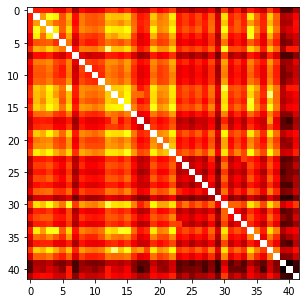

In [9]:
import zipfile
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd
import re

#Obtaining the ZIP file
my_zip = zipfile.ZipFile('shakespeares-works_TXT_FolgerShakespeare.zip')
storage_path = '.'
#Each txt file inside the ZIP file will be stored in a list
documents = []
for file in my_zip.namelist():
    #Only TXT files will be accepted to be stored in the documents and documents name lists
    #For some reason MAC OS's generates an extra folder called "__MACOSX" which will be excluded
    if my_zip.getinfo(file).filename.endswith('.txt') and not my_zip.getinfo(file).filename.startswith('__MACOSX'):
        my_zip.extract(file, storage_path)
        with open (my_zip.getinfo(file).filename, "r") as doc:
            documents.append(doc.read())

#We call the TF-IDF from the Sklearn module
tfidf_vectorizer = TfidfVectorizer()

#We generate the tf-idf vectors for the text files
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

#Computing the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

#We reshape to a 42 by 42 matrix in a numpy array
a = np.array(cosine_sim_matrix)
new_cos_similarity_matrix = a.reshape(len(cosine_sim_matrix),len(cosine_sim_matrix))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(new_cos_similarity_matrix, cmap='hot', interpolation='nearest')

###**Doc2Vec - Heatmap**

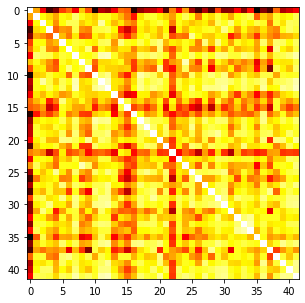

In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models.doc2vec import TaggedDocument

#Sentence tokenization and word tokenization process
full_play = "".join(documents) #All the files will be joined together and stored in a variable
sentences = sent_tokenize(full_play)
corpus = []

for i in range(len(sentences)):
    corpus.append(word_tokenize(sentences[i]))

#Labeling and training the model
labeled_documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]
model= gensim.models.Doc2Vec(labeled_documents, min_count=1,workers=1, window=10, epochs = 5)

#Sentence and word tokenization per document
document_tokenized = []

for i in range(len(documents)):
    sentences = sent_tokenize(documents[i])
    for j in range(len(sentences)):
        document_tokenized.append(word_tokenize(sentences[j]))

#Initializing the matrix
sim_matrix_2 = []
#Computing the similarity matrix
for i in range(len(documents)):
    sim_matrix_row = []
    for j in range(len(documents)):
        sim_matrix_row.append(model.n_similarity(document_tokenized[i],document_tokenized[j]))
    sim_matrix_2.append(sim_matrix_row)

#We reshape to a 42 by 42 matrix in a numpy array
a = np.array(sim_matrix_2)
new_cos_similarity_matrix = a.reshape(len(sim_matrix_2),len(sim_matrix_2))

clear_output()
#Plotting the similarity matrix in a heatmap
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(new_cos_similarity_matrix, cmap='hot', interpolation='nearest')

###**Answer the following questions**

**What are the differences you find between the two methods?** The similarity results on the Doc2Vec approach are relatively higher compared to the cosine similarity approach.

**Is there anything radically different? Please describe your answer in terms of the heatmap of part a and part b.** Yes, looking at the heatmap from part A and part B we see that the similarity between each document is higher in the Word2Vec approach than the cosine similarity approach. The only thing similar we see is that their same documents are 100% similar (see white diagonal line in both heatmaps), but the rest is completely different. Cosine similarity computes similarity between samples while Doc2Vec is an NLP tool for representing documents as a vector. I think the reason why they are different is because of the parameters used to train the Doc2Vec model, specially with the window parameter, in which specifies the maximum distance between the current and predicted word within a sentence. I think that, increasing this number we could get a more reliable result and see if it gets closer or not from the result from the cosine similarity approach.

##**EXERCISE 3**

**(30 points)** Using the Homework 2 dataset. Use SpaCy to extract the following:

*   Write a function to generate all **unique bigrams** from all documents in the dataset. The input of this function should be the concatenated dataset and the output should be the **list of bigrams and their frequency**. Display the top 10 most common bigrams and their frequency.
*   Write a function to generate all **unique trigrams** from all documents in the dataset. The input of this function should be the concatenated dataset and the output should be the **list of trigrams and their frequency**. Display the top 10 most common trigrams and their frequency.
*   Write a function to extract all **unique NOUN and VERB** tokens. The input of this function should be the concatenated dataset and the output should be **two lists: one of the NOUN tokens and their frequency, the other list should be the VERB tokens and their counts**. Display the top 10 most common NOUN and VERB tokens.

###**Generating and displaying TOP 10 unique bigrams**

**Function to generate unique bigrams and their frequency**

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

def generate_bigrams(concatenated_dataset):

    #In order to avoid to exceed the RAM limit, we will split the concatenated dataset in batches of 10
    text_lines = concatenated_dataset.split("\n")
    for i in range(len(text_lines)):
        #Removing line breaks
        text_lines[i] = re.sub(r'(\n.?)+', r' ', text_lines[i])
        #Removing tab delimiters
        text_lines[i] = re.sub(r'(\t.?)+', r' ', text_lines[i])
        #Removing extra whitespaces
        text_lines[i] = re.sub(' +', ' ', text_lines[i])

    num_lines = len(text_lines)
    batches = int(num_lines/10)

    chunks = [text_lines[i:i + batches] for i in range(0, len(text_lines), batches)]

    #Counting the bigrams
    last_gram_chunk = ""
    bigram_frequency = {}
    for i in range(len(chunks)):
        temp_chunk_joined = ''.join(chunks[i])
        chunk_play_grams = nlp(temp_chunk_joined)
      
        if i != 0:
            temp_bigram = last_gram_chunk+" "+chunk_play_grams[0].text
            if (temp_bigram in bigram_frequency):
                bigram_frequency[temp_bigram] += 1
            else:
                bigram_frequency[temp_bigram] = 1

        for j in range(len(chunk_play_grams)-1):
              temp_bigram = chunk_play_grams[j].text+" "+chunk_play_grams[j+1].text
              if (temp_bigram in bigram_frequency):
                bigram_frequency[temp_bigram] += 1
              else:
                bigram_frequency[temp_bigram] = 1

              if j == len(chunk_play_grams) -2:
                  last_gram_chunk = chunk_play_grams[j+1].text
        #To avoid RAM being full we delete the old chunk
        del chunk_play_grams

    sorted_dict = dict(sorted(bigram_frequency.items(), key=lambda item: item[1], reverse=True))

    #Returns the results as a list of tuples
    return [(k, v) for k, v in sorted_dict.items()]

**Displaying the top 10 bigrams**

In [12]:
import pandas as pd

list_bigrams = generate_bigrams(full_play)
print("\033[1m Top 10 bigrams and their frequency \033[0m \n")
result = list_bigrams[:10]

df_top_bigrams = pd.DataFrame(columns=['Bigram','Frequency'])
df_top_bigrams['Bigram'] = [a_tuple[0] for a_tuple in result]
df_top_bigrams['Frequency'] = [a_tuple[1] for a_tuple in result]

print(df_top_bigrams)

 Top 10 bigrams and their frequency  

   Bigram  Frequency
0   , and       7222
1     , I       4175
2   , And       3696
3     . I       2837
4     , [       2724
5    , my       2204
6    I am       1626
7   you ,       1577
8   , sir       1560
9  in the       1495


###**Generating and displaying TOP 10 unique trigrams**

**Function to generate unique trigrams and their frequency**

In [13]:
def generate_trigrams(concatenated_dataset):

    #In order to avoid to exceed the RAM limit, we will split the concatenated dataset in batches of 10
    text_lines = concatenated_dataset.split("\n")
    for i in range(len(text_lines)):
        #Removing line breaks
        text_lines[i] = re.sub(r'(\n.?)+', r' ', text_lines[i])
        #Removing tab delimiters
        text_lines[i] = re.sub(r'(\t.?)+', r' ', text_lines[i])
        #Removing extra whitespaces
        text_lines[i] = re.sub(' +', ' ', text_lines[i])

    num_lines = len(text_lines)
    batches = int(num_lines/10)

    chunks = [text_lines[i:i + batches] for i in range(0, len(text_lines), batches)]

    #Counting the bigrams
    last_gram_chunk = ""
    second_last_gram_chunk = ""
    trigram_frequency = {}
    for i in range(len(chunks)):
        temp_chunk_joined = ''.join(chunks[i])
        chunk_play_grams = nlp(temp_chunk_joined)
      
        if i != 0:
            temp_bigram = second_last_gram_chunk+" "+last_gram_chunk+" "+chunk_play_grams[0].text
            if (temp_bigram in trigram_frequency):
                trigram_frequency[temp_bigram] += 1
            else:
                trigram_frequency[temp_bigram] = 1
            
            temp_bigram = last_gram_chunk+" "+chunk_play_grams[0].text+" "+chunk_play_grams[1].text
            if (temp_bigram in trigram_frequency):
                trigram_frequency[temp_bigram] += 1
            else:
                trigram_frequency[temp_bigram] = 1
          

        for j in range(len(chunk_play_grams)-2):
              temp_bigram = chunk_play_grams[j].text+" "+chunk_play_grams[j+1].text+" "+chunk_play_grams[j+2].text
              if (temp_bigram in trigram_frequency):
                trigram_frequency[temp_bigram] += 1
              else:
                trigram_frequency[temp_bigram] = 1

              if j == len(chunk_play_grams) -3:
                  second_last_gram_chunk = chunk_play_grams[j+1].text+" "+chunk_play_grams[j+2].text
              if j == len(chunk_play_grams) -2:
                  last_gram_chunk = chunk_play_grams[j+1].text+" "+chunk_play_grams[j+1].text
        #To avoid RAM being full we delete the old chunk
        del chunk_play_grams

    sorted_dict = dict(sorted(trigram_frequency.items(), key=lambda item: item[1], reverse=True))

    #Returns the results as a list of tuples
    return [(k, v) for k, v in sorted_dict.items()]

**Displaying the top 10 trigrams**

In [14]:
import pandas as pd

list_trigrams = generate_trigrams(full_play)
print("\033[1m Top 10 trigrams and their frequency \033[0m \n")
result = list_trigrams[:10]

df_top_trigrams = pd.DataFrame(columns=['Trigram','Frequency'])
df_top_trigrams['Trigram'] = [a_tuple[0] for a_tuple in result]
df_top_trigrams['Frequency'] = [a_tuple[1] for a_tuple in result]

print(df_top_trigrams)

 Top 10 trigrams and their frequency  

     Trigram  Frequency
0    , sir ,        991
1     , [ to        876
2  , my lord        835
3     , [ as        717
4     ' th '        580
5  my lord ,        512
6  , [ aside        444
7    , sir .        440
8   , I will        381
9    , I 'll        364


###**Extracting unique NOUN and VERB tokens**

**Function to extract unique NOUN abd VERB tokens**

In [15]:
def get_verb_noun(concatenated_dataset):

    #In order to avoid to exceed the RAM limit, we will split the concatenated dataset in batches of 10
    text_lines = concatenated_dataset.split("\n")
    for i in range(len(text_lines)):
        #Removing line breaks
        text_lines[i] = re.sub(r'(\n.?)+', r' ', text_lines[i])
        #Removing tab delimiters
        text_lines[i] = re.sub(r'(\t.?)+', r' ', text_lines[i])
        #Removing extra whitespaces
        text_lines[i] = re.sub(' +', ' ', text_lines[i])

    num_lines = len(text_lines)
    batches = int(num_lines/10)

    chunks = [text_lines[i:i + batches] for i in range(0, len(text_lines), batches)]

    #Counting the bigrams
    noun_frequency = {}
    verb_frequency = {}
    for i in range(len(chunks)):
        temp_chunk_joined = ''.join(chunks[i])
        chunk_play_grams = nlp(temp_chunk_joined)

        for j in range(len(chunk_play_grams)):
              
              if chunk_play_grams[j].pos_ == "NOUN":
                  noun_temp = chunk_play_grams[j].text
                  if (noun_temp in noun_frequency):
                    noun_frequency[noun_temp] += 1
                  else:
                   noun_frequency[noun_temp] = 1
              
              if chunk_play_grams[j].pos_ == "VERB":
                  verb_temp = chunk_play_grams[j].text
                  if (verb_temp in verb_frequency):
                    verb_frequency[verb_temp] += 1
                  else:
                   verb_frequency[verb_temp] = 1

        #To avoid RAM being full we delete the old chunk
        del chunk_play_grams

    sorted_noun = dict(sorted(noun_frequency.items(), key=lambda item: item[1], reverse=True))
    sorted_verb = dict(sorted(verb_frequency.items(), key=lambda item: item[1], reverse=True))

    #Returns the results as a list with two lists of tuples
    return [[(k, v) for k, v in sorted_noun.items()],[(k, v) for k, v in sorted_verb.items()]]

**Displaying the top 10 NOUN and VERB tokens**

In [16]:
import pandas as pd

list_nounverbs = get_verb_noun(full_play)
print("\033[1m Top 10 NOUNS and VERBS and their frequency \033[0m \n")

result_noun = list_nounverbs[0][:10]
result_verb = list_nounverbs[1][:10]

df_top_nounverbs = pd.DataFrame(columns=['Noun', 'Frequency (Noun)', 'Verb', 'Frequency (Verb)'])
df_top_nounverbs['Noun'] = [a_tuple[0] for a_tuple in result_noun]
df_top_nounverbs['Frequency (Noun)'] = [a_tuple[1] for a_tuple in result_noun]
df_top_nounverbs['Verb'] = [a_tuple[0] for a_tuple in result_verb]
df_top_nounverbs['Frequency (Verb)'] = [a_tuple[1] for a_tuple in result_verb]

print(df_top_nounverbs)

 Top 10 NOUNS and VERBS and their frequency  

     Noun  Frequency (Noun)    Verb  Frequency (Verb)
0     man              1656    will              4213
1    love              1368   shall              3161
2     sir              1218   would              1972
3   heart               915     'll              1830
4       t               903     can              1756
5    time               882    know              1482
6  father               881    make              1470
7     men               825     may              1442
8    life               780  should              1415
9    hand               720    must              1394


###**Answer the following questions**

**What do you think the most common bigrams and trigrams could be useful for?** 
With the extraction of the most common bigrams and trigrams, they could be used for prediction. For example, it could be useful to automatically autocomplete a search (like the one implemented from Google).

**There is a particular method we have seen in this class to characterize a corpus that could benefit from having these bigrams/trigrams when the underlying text corpus can’t be shared. Please talk about this.** That particular method is related by training a model (based on the probabilities of an n-gram given a text corpus) to generate text based on the probability threshold. Given n-grams, the higher the n is, the generated text will make more sense, although the process will be slower because it requires lot of CPU resources. One of the recommendations to get good results is that we need to train robust models that generalize, in order to avoid getting zero probabilities n-grams, and getting very bad results.

##**EXERCISE 4**

**(30 points)** Using the dataset: **Ask0729**, found in Exam files, write two functions to extract all dates found in this dataset. The input of these functions should take the dataset as input, and output a list of dates. You should use two different methods, one per function.

*   First method: **using SpaCy** (this is a big enough hint)
*   Second method: using **regular expressions**.
*   Print to screen to compare the results from the two functions.

In [17]:
import zipfile
#Downloading the Ask0729 dataset
!wget https://github.com/LuisRobles18/NLP/raw/main/Ask0729.zip -O Ask0729.zip
clear_output()

#Obtaining the ZIP file
my_zip = zipfile.ZipFile('Ask0729.zip')
storage_path = '.'
#Each txt file inside the ZIP file will be stored in a list
ask_dataset= ""
for file in my_zip.namelist():
    #Only TXT files will be accepted to be stored in the documents and documents name lists
    #For some reason MAC OS's generates an extra folder called "__MACOSX" which will be excluded
    if my_zip.getinfo(file).filename.endswith('.txt') and not my_zip.getinfo(file).filename.startswith('__MACOSX'):
        ask_dataset = my_zip.read(my_zip.getinfo(file).filename).decode('utf-8')

###**First method - Using SpaCy**

In [18]:
def get_dates_spacy(concatenated_dataset):
    list_dates = []
    doc = nlp(concatenated_dataset)
    for entity in doc.ents:
        if entity.label_ == "DATE":
            list_dates.append(entity.text)
    
    return list_dates

###**Second method - Using Regular Expressions**

In [19]:
import re
def get_dates_regex(concatenated_dataset):
  list_results = []
  #Search for any date in different formats
  list_results.append(re.findall( r'^([1-9]|0[1-9]|1[0-9]|2[0-9]|3[0-1])(\.|-|\/)([1-9]|0[1-9]|1[0-2])(\.|-|\/)([0-9][0-9]|19[0-9][0-9]|20[0-9][0-9])$|\
  ^([0-9][0-9]|19[0-9][0-9]|20[0-9][0-9])(\.|-|\/)([1-9]|0[1-9]|1[0-2])(\.|-|\/)([1-9]|0[1-9]|1[0-9]|2[0-9]|3[0-1])$', concatenated_dataset))
  #Example: 15 Jan 2021 or 15
  list_results.append(re.findall( r'\d{2}\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{4}|\
  \d{2}\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)', concatenated_dataset))
  #Example: 15 January 2021 or 15 January
  list_results.append(re.findall( r'\d{2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}|\
  \d{2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)', concatenated_dataset))
  #Example: Jan 15 2021 or Jan 15
  list_results.append(re.findall( r'(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{2}\s\d{4}|\
  (?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{2}', concatenated_dataset))
  #Example: January 15 2021 or January 15
  list_results.append(re.findall( r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{2}\s\d{4}|\
  (?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{2}', concatenated_dataset))
  return list_results

###**Showing the results from both methods**

**Using SpaCy**

In [20]:
print(get_dates_spacy(ask_dataset))

['up to 5 years', 'today', 'today', 'today', 'one week', 'MA 02143', 'daily', 'today', '3+ Nights & Save', 'this week', 'weekend', 'this week', '2 Weeks', 'the year', 'tomorrow', 'Wednesday', 'Saturday', 'the 6 year old', 'tomorrow', '25 years', 'year end 2000', 'under 40/over 40', 'junior-year', 'all summer', 'next week', 'yesterday', 'Monday', 'Thursday 4:00PM', 'July 31, 2014', '30 June 2012', 'April 15th', 'this year', 'this time', 'next year', 'years', 'Friday', 'Monday', 'December 7th', 'yesterday', 'yesterday', 'tomorrow', '14 day', '2 days', 'years', 'tomorrow', 'tomorrow', 'tomorrow', 'the next year', 'Sunday', 'a day', '12 MONTHS', 'July 4, 2012', 'Tomorrow', 'this week', 'Tuesday, March 20, 2001', 'annual', '21st Century', 'this week', 'tomorrow', 'next Wednesday', 'the old days', 'Next week', 'April', 'the 19th', 'August 31st', 'the year', 'only a week', 'June 23, 2000', 'today', 'Last week', 'Friday', 'the week', 'the 31st of March', '1 Year Giveaway', 'Thanksgiving', 'Tod

**Using Regex**

In [21]:
print(get_dates_regex(ask_dataset))

[[], [], ['30 June 2012', '28 August 2011', '29 April 2012'], [], []]


###**Answer the following questions**

**Which one of the two approaches was better?** I think the first one (SpaCy) was better

 **Why do you think so?** Because SpaCy extracted many possible types of dates it can be found on a text, and we can make some adjustments to limit which types of dates we want to show (For example, if we want to show Dates in numerical format). While for the regex approach, it was really difficult trying to capture all possible combinations a date could have. Even using complex patterns to match dates in several ways, I was only able to extract only 3 dates, and comparing to the one from SpaCy, we see there are definetly more dates inside the text.

 **Would you use any of these approaches? Or a different one?** I would definetly use SpaCy because it is faster and it doesn't require a lot of time to code. Also, as explained before, I could customize this search, by creating some rules to only extract certain types of dates if needed (Dates in numerical format, or Dates with month as string, or Dates with only month and day, etc).


##**EXERCISE 5**

**(30 points)** Train an LSTM model to classify the [Cornell Movie Review data](http://www.cs.cornell.edu/people/pabo/movie-review-data/)
using the [polarity_dataset V2.0](http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz). You can use the code for class 19, but take a note that you will have to adapt some of the parameters like: 

*   Review size = **450**
*   Epochs = **5**
*   85% for **training** and 15% for **testing**

Once you build the model, please display the sklearn classification report. 

###**Downloading and exporting the dataset to a dataframe**

In [22]:
import tarfile
import zipfile
import os

#Downloading the polarity dataset from the Cornell Movie Review data
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz -O review_polarity.tar.gz
clear_output()

#We ensure there is no zipped files with the same name
if os.path.exists("review_polarity.zip"):
  os.remove("review_polarity.zip")

#Converting Gzip file to zip file
#The reason to convert it to Zip file, is because python gzip module is not able to read the filenames inside the
#file (without extracting them). Converting it to a ZIP file will allow to know the path of each file inside it and to
#separate the files (one from the "pos folder", and the other one from the "neg" folder)
tar_file = tarfile.open( name='review_polarity.tar.gz', mode='r|gz' )
zip_file = zipfile.ZipFile( file='review_polarity.zip', mode='a', compression=zipfile.ZIP_DEFLATED)
for m in tar_file:
    f = tar_file.extractfile(m)
    fl = f.read()
    fn = m.name
    zip_file.writestr(fn, fl)
tar_file.close()
zip_file.close()

In [23]:
#All the files will be stored in a pandas dataframe
text_reviews = []
label_reviews= []
#The value for negative reviews will be 0, and for positive reviews 1
target_names = ["negative_reviews","positive_reviews"]

#Openning the dataset ZIP file and extracting the polarity reviews
my_zip = zipfile.ZipFile('review_polarity.zip')
storage_path = '.'

for file in my_zip.namelist():
    #We will extract the negative reviews first to the list
    if file.startswith('txt_sentoken/neg/') and file.endswith('.txt'):
        with my_zip.open(file,"r") as doc:
            #Since the files read are from a zip file, we must convert them from binary to string using the decode function
            text_reviews.append(doc.read().decode())
            #This will be used for the next exercise. For negative reviews, the value for the target will be 0
            label_reviews.append(0)

for file in my_zip.namelist():
    #Then we will extract the positive reviews to the list
    if file.startswith('txt_sentoken/pos/') and file.endswith('.txt'):
        with my_zip.open(file,"r") as doc:
            #Since the files read are from a zip file, we must convert them from binary to string using the decode function
            text_reviews.append(doc.read().decode())
            #This will be used for the next exercise. For positive reviews, the value for the target will be 1
            label_reviews.append(1)

clear_output()
df_polarity_dataset = pd.DataFrame(columns=['Text', 'Label'])
df_polarity_dataset['Text'] = text_reviews
df_polarity_dataset['Label'] = label_reviews
df_polarity_dataset = df_polarity_dataset.sample(frac=1)

df_polarity_dataset.head()

,Text,Label
436,chill factor is a carbon copy of speed with on...,0
1312,synopsis : shrek ( myers ) is an ogre living i...,1
302,"the tagline for this film is : "" some houses a...",0
681,"seen at : amc old pasadena 8 , pasadena , ca (...",0
1370,i didn't realize how apt the name of this movi...,1


###**Splitting data training and validation**

In [24]:
from sklearn.model_selection import train_test_split

list_data = list(df_polarity_dataset['Text'])
list_target = list(df_polarity_dataset['Label'])

training_data, test_data, training_target, test_target = train_test_split(
    list_data, list_target, test_size=0.15, random_state = 12345)

df_summary_split = pd.DataFrame(columns=['Split group','Percentage', 'Negative Reviews', 'Positive Reviews', 'Size'])
df_summary_split.loc[len(df_summary_split), :] = ['Training Data','85%', training_target.count(0), 
                                                  training_target.count(1), len(training_data)]
df_summary_split.loc[len(df_summary_split), :] = ['Testing Data','15%', test_target.count(0), 
                                                  test_target.count(1), len(test_data)]
df_summary_split.loc[len(df_summary_split), :] = ['All (Total)', '100%', test_target.count(0)+training_target.count(0), 
                                                  test_target.count(1)+training_target.count(1), len(list_data)]
df_summary_split['Size'] = df_summary_split['Size'].apply(lambda x: "{:,}".format(x))
df_summary_split['Negative Reviews'] = df_summary_split['Negative Reviews'].apply(lambda x: "{:,}".format(x))
df_summary_split['Positive Reviews'] = df_summary_split['Positive Reviews'].apply(lambda x: "{:,}".format(x))
df_summary_split

,Split group,Percentage,Negative Reviews,Positive Reviews,Size
0,Training Data,85%,843,857,"1,700"
1,Testing Data,15%,157,143,300
2,All (Total),100%,"1,000","1,000","2,000"


###**Data insight and pre-processing**

In [34]:
import tensorflow as tf 
from tensorflow.keras.preprocessing import sequence
from numpy import array
from keras.preprocessing.text import Tokenizer

tf.random.set_seed(12345)
# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

# Concatonate test and training datasets
allreviews = np.concatenate((training_data, test_data), axis=0)

# Review lengths across test and training whole datasets
print("Maximum review length: {}".format(len(max((allreviews), key=len))))
print("Minimum review length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

# The length of reviews
review_length = 450

tokenizer = Tokenizer(num_words=review_length, lower=True)
tokenizer.fit_on_texts(np.array(df_polarity_dataset['Text']))
x_train = tokenizer.texts_to_sequences(np.array(training_data))
x_train = sequence.pad_sequences(x_train, maxlen=review_length)

x_test = tokenizer.texts_to_sequences(np.array(test_data))
x_test = sequence.pad_sequences(x_test, maxlen=review_length)

y_train = np.array(training_target)
y_test = np.array(test_target)

print("")
print("Shape Training Review Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(x_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

Maximum review length: 14957
Minimum review length: 91
Mean review length: 3893.002

Shape Training Review Data: (1700, 450)
Shape Training Class Data: (1700,)
Shape Test Review Data: (300, 450)
Shape Test Class Data: (300,)


###**Creating and building LSTM Recurrent Neural Network**

In [35]:
model = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model.add(
    tf.keras.layers.Embedding(
        input_dim = 10000, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = review_length # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM which is optimised for GPUs. This layer 
# looks at the sequence of words in the tweet, along with their word embeddings
# and uses both of these to determine to sentiment of a given tweet.
model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative tweet. Closer to 1 
# indicates a positive tweet.
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 450, 32)           320000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 450, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


###**Training LSTM**

In [40]:
# Train the LSTM on the training data
history = model.fit(x_train, y_train, batch_size=256, epochs=5,validation_split=0.2,verbose=1) 

Epoch 1/5
6/6 [==============================] - 0s 42ms/step - loss: 0.6300 - accuracy: 0.6485 - val_loss: 0.6388 - val_accuracy: 0.6765
Epoch 2/5
6/6 [==============================] - 0s 34ms/step - loss: 0.6058 - accuracy: 0.7191 - val_loss: 0.6119 - val_accuracy: 0.6941
Epoch 3/5
6/6 [==============================] - 0s 35ms/step - loss: 0.5656 - accuracy: 0.7471 - val_loss: 0.5969 - val_accuracy: 0.6676
Epoch 4/5
6/6 [==============================] - 0s 37ms/step - loss: 0.5199 - accuracy: 0.7713 - val_loss: 0.5463 - val_accuracy: 0.7412
Epoch 5/5
6/6 [==============================] - 0s 36ms/step - loss: 0.5010 - accuracy: 0.7897 - val_loss: 0.5643 - val_accuracy: 0.7206


###**Sklearn classification report**

In [41]:
import warnings
warnings.filterwarnings("ignore")

# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=["Negative","Positive"]))

              precision    recall  f1-score   support

    Negative       0.70      0.79      0.74       157
    Positive       0.73      0.63      0.68       143

    accuracy                           0.71       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.72      0.71      0.71       300



###**Answer the following questions**
**What are you noticing here? Anything unexpected?** Looking at the performance from the LSTM model, I was expecting to have acceptable results, but turns out that, looking at the precision and recall, the model did a very bad job

**How does this model compare to the one built with the IMDB dataset in class?**
One of the differences from the model from Class 19 is that, that one has more samples to train (25,000 for training and 25,000 for testing), while this one only had 1,700 for training and 300 records for testing. Also, the data split is different, the one from Class 19 has 50%/50% for training and testing, while this one has 85%/15% for training and testing. And finally, the length from class 19 is 500, while this one is 450. The reason why I think the model from Class 19 performed better is because it had more data to be trained and tested, thus, we got better results compared to this model that used a very small dataset.

 **Any ideas on how to improve it?** If we don't have the option to get more data for training, the other alternative could be pre-processing the data, that is, removing stop words. Also, increasing the length, and the number of LSTM units in the Layer, as well as the number of batches and modifying the learning rate from Adam Optimizer, could lead to get a better performance, although it would require more GPU resources.

##**EXERCISE 6**

**(30 points)** Use the **train.txt** file from the [PubMed 20K RCT dataset](https://github.com/Franck-Dernoncourt/pubmed-rct/tree/master/PubMed_20k_RCT) fine-tune a BERT transformer (class 9 code). This task is a bit different as the one seen in class, here the source dataset has FIVE different classes: **background, objective, method, result, and conclusion**. Once the BERT model is fine-tuned, classify the: **test.txt** set. Please present the per-class classification report (accuracy, precision, recall, f1-score metrics). Also, present the global metrics - all classes (accuracy, precision, recall, f1-score metrics).


###**Obtaining the training and test files**

In [42]:
#Downloading the train.txt file
!wget https://github.com/Franck-Dernoncourt/pubmed-rct/raw/master/PubMed_20k_RCT/train.txt -O train.txt
#Downloading the test.txt file
!wget https://github.com/Franck-Dernoncourt/pubmed-rct/raw/master/PubMed_20k_RCT/test.txt -O test.txt
clear_output()

In [43]:
import pandas as pd
import numpy as np
#Reading train.txt file
#Convert txt file to TSV file
with open('train.txt') as infile, open('train.tsv', 'w') as outfile:
    for line in infile:
        if not line.strip(): continue
        if line.startswith('###'): continue
        outfile.write(line)

#Reading the new TSV file from the training data
df_training_data = pd.read_csv('train.tsv', sep='\t',encoding = 'utf8',lineterminator='\n',
                                 names = ['Class','Text'], low_memory=False, dtype=str)
df_training_data['Type'] = "Training"

#Reading test.txt file

#Convert txt file to TSV file
with open('test.txt') as infile, open('test.tsv', 'w') as outfile:
    for line in infile:
        #We remove empty lines and unnecesary lines
        if not line.strip(): continue
        if line.startswith('###'): continue
        outfile.write(line)

#Reading the new TSV file from the training data
df_val_data = pd.read_csv('test.tsv', sep='\t',encoding = 'utf8',lineterminator='\n',
                                 names = ['Class','Text'], low_memory=False, dtype=str)
df_val_data['Type'] = "Validation"

#Encoding the Labels
possible_labels = df_training_data['Class'].unique()
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

#Inserting the labels with the encoded labels
df_training_data['Label'] = df_training_data['Class'].replace(label_dict)
df_val_data['Label'] = df_val_data['Class'].replace(label_dict)
label_dict_inverse = {v: k for k, v in label_dict.items()}

frames = [df_training_data,df_val_data]
df_data = pd.concat(frames)

print("\033[1mSize of training data:\033[0m "+str(len(df_training_data))+"\n")
print("\033[1mSize of validation data:\033[0m "+str(len(df_val_data))+"\n")
print("\033[1m===Summary of splits per class===\033[0m \n")
df_data.groupby(['Class','Type']).count()['Text']

Size of training data: 180040

Size of validation data: 30135

===Summary of splits per class=== 



Class        Type      
BACKGROUND   Training      21727
             Validation     3621
CONCLUSIONS  Training      27168
             Validation     4571
METHODS      Training      59353
             Validation     9897
OBJECTIVE    Training      13839
             Validation     2333
RESULTS      Training      57953
             Validation     9713
Name: Text, dtype: int64

###**Installing HuggingFace and importing modules**

In [44]:
!pip install transformers
clear_output()

In [45]:
#Modules required for training BERT models
import tensorflow as tf
import torch
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from transformers import BertForPreTraining
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
import time
import datetime

###**BERT Tokenizer and Encoding Data splits**

In [46]:
#BERT Tokenizer and encoding Data splits
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df_training_data.Text.values, 
    add_special_tokens=True,  # Add '[CLS]' and '[SEP]'
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128,
    return_tensors='pt', # Return pytorch tensors.
    truncation=True
)

encoded_data_val = tokenizer.batch_encode_plus(
    df_val_data.Text.values, 
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128,
    return_tensors='pt',# Return pytorch tensors.
    truncation=True
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df_training_data.Label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df_val_data.Label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

clear_output()

###**BERT Pre-trained model**

In [47]:
#BERT Pre-trained model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_dict), 
                                                      output_attentions=False, output_hidden_states=False)
#Data Loader
batch_size = 12
dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)
dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)
#Optimizer and scheduler
optimizer = AdamW(model.parameters(),
                  lr=2e-5, 
                  eps=1e-8)       
epochs = 3
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

clear_output()

###**Defining performance metrics**

In [48]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

###**Training process**

In [49]:
#Set seed to 12345
torch.manual_seed(12345)
torch.cuda.manual_seed_all(12345)

#To avoid our CUDA's memory being full, we empty the cache first
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cuda:0"
model = model.to(device)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(dataloader_train):

        # Progress update every 1000 batches.
        if step % 1000 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(dataloader_train), elapsed))
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(dataloader_train)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))

#Saving fine-tuned BERT model
#In order to avoid re-training the code and do this task faster
torch.save(model.state_dict(),'finetuned_BERT.model')


======== Epoch 1 / 3 ========
Training...
  Batch 1,000  of  15,004.    Elapsed: 0:01:42.
  Batch 2,000  of  15,004.    Elapsed: 0:03:24.
  Batch 3,000  of  15,004.    Elapsed: 0:05:07.
  Batch 4,000  of  15,004.    Elapsed: 0:06:49.
  Batch 5,000  of  15,004.    Elapsed: 0:08:31.
  Batch 6,000  of  15,004.    Elapsed: 0:10:14.
  Batch 7,000  of  15,004.    Elapsed: 0:11:56.
  Batch 8,000  of  15,004.    Elapsed: 0:13:38.
  Batch 9,000  of  15,004.    Elapsed: 0:15:20.
  Batch 10,000  of  15,004.    Elapsed: 0:17:02.
  Batch 11,000  of  15,004.    Elapsed: 0:18:44.
  Batch 12,000  of  15,004.    Elapsed: 0:20:26.
  Batch 13,000  of  15,004.    Elapsed: 0:22:08.
  Batch 14,000  of  15,004.    Elapsed: 0:23:50.
  Batch 15,000  of  15,004.    Elapsed: 0:25:33.

  Average training loss: 0.42
  Training epoch took: 0:25:33

======== Epoch 2 / 3 ========
Training...
  Batch 1,000  of  15,004.    Elapsed: 0:01:42.
  Batch 2,000  of  15,004.    Elapsed: 0:03:24.
  Batch 3,000  of  15,004.    

###**Evaluating performance on test.txt dataset**

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Prediction on test set
print('Predicting labels for {:,} test sentences...'.format(len(input_ids_val)))
print("\n")

#Loading and evaluating the model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_dict), output_attentions=False, output_hidden_states=False)
model.to(device)
model.load_state_dict(torch.load('finetuned_BERT.model', map_location=torch.device('cpu')))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in dataloader_validation:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)


#Storing the classification report variables
predictions = np.concatenate(predictions, axis=0)
preds_flat = np.argmax(predictions, axis=1).flatten()
true_vals = np.concatenate(true_labels, axis=0)
labels_flat = true_vals.flatten()

clear_output()
print("\033[1mGlobal metrics and per-class metrics (Fine-tuned BERT)\033[0m \n")
print(classification_report(labels_flat.tolist(), preds_flat.tolist(), target_names=label_dict_inverse.values()))

#For the bonus exercise
df_summary_performance = pd.DataFrame(columns=['Model','Precision', 'Recall', 'F1-Score'])

model_precision = precision_score(labels_flat.tolist(), preds_flat.tolist(), average='macro')
model_recall = recall_score(labels_flat.tolist(), preds_flat.tolist(),average='macro')
model_f1 = f1_score(preds_flat.tolist(), labels_flat.tolist(), average='macro')

model_bert_metrics = ['BERT', model_precision,model_recall,model_f1]
df_summary_performance.loc[len(df_summary_performance), :] = model_bert_metrics

Global metrics and per-class metrics (Fine-tuned BERT) 

              precision    recall  f1-score   support

   OBJECTIVE       0.72      0.60      0.65      2333
     METHODS       0.92      0.95      0.94      9897
     RESULTS       0.93      0.90      0.91      9713
 CONCLUSIONS       0.84      0.82      0.83      4571
  BACKGROUND       0.68      0.78      0.73      3621

    accuracy                           0.87     30135
   macro avg       0.82      0.81      0.81     30135
weighted avg       0.87      0.87      0.87     30135



###**Answer the following questions**

**Did you model beat the baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve it?** Looking at the baseline results and the one obtained from here, I wasn't able to beat them. Some of the possible ways to improve it could be data pre-processing (like removing stop words), increasing the max length, as well as the number of batches and modifying the learning rate from Adam Optimizer. With those adjustments I could probably get a better result compared to the one obtained in this exercise.

##**BONUS EXERCISE**

**(50 points)** Solve question 6 but instead for fine-tuning BERT, use: BioBert (20 points) and BlueBERT (20 points) and compare the results of the three approaches in a nice table.

###**Fine-tuning BioBERT**

In [55]:
#==========BERT Tokenizer and encoding data =====================
#BERT Tokenizer and encoding Data splits
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-v1.1', do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df_training_data.Text.values, 
    add_special_tokens=True,  # Add '[CLS]' and '[SEP]'
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128,
    return_tensors='pt', # Return pytorch tensors.
    truncation=True
)

encoded_data_val = tokenizer.batch_encode_plus(
    df_val_data.Text.values, 
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128,
    return_tensors='pt',# Return pytorch tensors.
    truncation=True
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df_training_data.Label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df_val_data.Label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

clear_output()
#===========BERT PRE-TRAINED MODEL ==============================
model = BertForSequenceClassification.from_pretrained("dmis-lab/biobert-v1.1", num_labels=len(label_dict), 
                                                      output_attentions=False, output_hidden_states=False)

#Data Loader
batch_size = 12
dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)
dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)
#Optimizer and scheduler
optimizer = AdamW(model.parameters(),
                  lr=2e-5, 
                  eps=1e-8)       
epochs = 3
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

clear_output()

#=====================DEFINING FUNCTIONS ===============================
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

#===================== BERT TRAINING PROCESS ==============================

#Set seed to 12345
torch.manual_seed(12345)
torch.cuda.manual_seed_all(12345)

#We run the model in the GPU
device = "cuda:0"
model = model.to(device)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(dataloader_train):

        # Progress update every 1000 batches.
        if step % 1000 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(dataloader_train), elapsed))
            
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(dataloader_train)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))

#Saving fine-tuned BERT model
#In order to avoid re-training the code and do this task faster
torch.save(model.state_dict(),'finetuned_BioBERT.model')


======== Epoch 1 / 3 ========
Training...
  Batch 1,000  of  15,004.    Elapsed: 0:01:42.
  Batch 2,000  of  15,004.    Elapsed: 0:03:24.
  Batch 3,000  of  15,004.    Elapsed: 0:05:05.
  Batch 4,000  of  15,004.    Elapsed: 0:06:47.
  Batch 5,000  of  15,004.    Elapsed: 0:08:28.
  Batch 6,000  of  15,004.    Elapsed: 0:10:10.
  Batch 7,000  of  15,004.    Elapsed: 0:11:52.
  Batch 8,000  of  15,004.    Elapsed: 0:13:33.
  Batch 9,000  of  15,004.    Elapsed: 0:15:15.
  Batch 10,000  of  15,004.    Elapsed: 0:16:56.
  Batch 11,000  of  15,004.    Elapsed: 0:18:38.
  Batch 12,000  of  15,004.    Elapsed: 0:20:20.
  Batch 13,000  of  15,004.    Elapsed: 0:22:01.
  Batch 14,000  of  15,004.    Elapsed: 0:23:43.
  Batch 15,000  of  15,004.    Elapsed: 0:25:25.

  Average training loss: 0.38
  Training epoch took: 0:25:25

======== Epoch 2 / 3 ========
Training...
  Batch 1,000  of  15,004.    Elapsed: 0:01:42.
  Batch 2,000  of  15,004.    Elapsed: 0:03:23.
  Batch 3,000  of  15,004.    

In [56]:
#===================== BERT: VALIDATING ON TEST SPLIT ==============================
# Prediction on test set
print('Predicting labels for {:,} test sentences...'.format(len(input_ids_val)))
print("\n")

#Loading and evaluating the model
model = BertForSequenceClassification.from_pretrained("dmis-lab/biobert-v1.1", num_labels=len(label_dict), output_attentions=False, output_hidden_states=False)
model.to(device)
model.load_state_dict(torch.load('finetuned_BioBERT.model', map_location=torch.device('cpu')))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in dataloader_validation:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)


#Storing the classification report variables
predictions = np.concatenate(predictions, axis=0)
preds_flat = np.argmax(predictions, axis=1).flatten()
true_vals = np.concatenate(true_labels, axis=0)
labels_flat = true_vals.flatten()

clear_output()
print("\033[1mGlobal metrics and per-class metrics (Fine-tuned BioBERT)\033[0m \n")
print(classification_report(labels_flat.tolist(), preds_flat.tolist(), target_names=label_dict_inverse.values()))

#Metrics
model_precision = precision_score(labels_flat.tolist(), preds_flat.tolist(), average='macro')
model_recall = recall_score(labels_flat.tolist(), preds_flat.tolist(),average='macro')
model_f1 = f1_score(preds_flat.tolist(), labels_flat.tolist(), average='macro')

model_biobert_metrics = ['BioBERT',model_precision,model_recall,model_f1]
df_summary_performance.loc[len(df_summary_performance), :] = model_biobert_metrics

Global metrics and per-class metrics (Fine-tuned BioBERT) 

              precision    recall  f1-score   support

   OBJECTIVE       0.71      0.62      0.66      2333
     METHODS       0.93      0.95      0.94      9897
     RESULTS       0.93      0.92      0.92      9713
 CONCLUSIONS       0.86      0.84      0.85      4571
  BACKGROUND       0.70      0.77      0.74      3621

    accuracy                           0.88     30135
   macro avg       0.83      0.82      0.82     30135
weighted avg       0.88      0.88      0.87     30135



###**Fine-tuning BlueBERT**

In [57]:
#==========BERT Tokenizer and encoding data =====================
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df_training_data.Text.values, 
    add_special_tokens=True,  # Add '[CLS]' and '[SEP]'
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128,
    return_tensors='pt', # Return pytorch tensors.
    truncation=True
)

encoded_data_val = tokenizer.batch_encode_plus(
    df_val_data.Text.values, 
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128,
    return_tensors='pt',# Return pytorch tensors.
    truncation=True
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df_training_data.Label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df_val_data.Label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

clear_output()

#===========BERT PRE-TRAINED MODEL ==============================
model = BertForSequenceClassification.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12", num_labels=len(label_dict), 
                                                      output_attentions=False, output_hidden_states=False)

#Data Loader
batch_size = 12
dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)
dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)
#Optimizer and scheduler
optimizer = AdamW(model.parameters(),
                  lr=2e-5, 
                  eps=1e-8)       
epochs = 3
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

clear_output()

#=====================DEFINING FUNCTIONS ===============================
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

#===================== BERT TRAINING PROCESS ==============================

#Set seed to 12345
torch.manual_seed(12345)
torch.cuda.manual_seed_all(12345)

#To avoid our CUDA's memory being full, we empty the cache first
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cuda:0"
model = model.to(device)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(dataloader_train):

        # Progress update every 1000 batches.
        if step % 1000 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(dataloader_train), elapsed))
            
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(dataloader_train)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))

#Saving fine-tuned BERT model
#In order to avoid re-training the code and do this task faster
torch.save(model.state_dict(),'finetuned_BlueBERT.model')


======== Epoch 1 / 3 ========
Training...
  Batch 1,000  of  15,004.    Elapsed: 0:01:44.
  Batch 2,000  of  15,004.    Elapsed: 0:03:28.
  Batch 3,000  of  15,004.    Elapsed: 0:05:12.
  Batch 4,000  of  15,004.    Elapsed: 0:06:56.
  Batch 5,000  of  15,004.    Elapsed: 0:08:40.
  Batch 6,000  of  15,004.    Elapsed: 0:10:23.
  Batch 7,000  of  15,004.    Elapsed: 0:12:06.
  Batch 8,000  of  15,004.    Elapsed: 0:13:50.
  Batch 9,000  of  15,004.    Elapsed: 0:15:33.
  Batch 10,000  of  15,004.    Elapsed: 0:17:17.
  Batch 11,000  of  15,004.    Elapsed: 0:19:00.
  Batch 12,000  of  15,004.    Elapsed: 0:20:43.
  Batch 13,000  of  15,004.    Elapsed: 0:22:27.
  Batch 14,000  of  15,004.    Elapsed: 0:24:09.
  Batch 15,000  of  15,004.    Elapsed: 0:25:52.

  Average training loss: 0.37
  Training epoch took: 0:25:52

======== Epoch 2 / 3 ========
Training...
  Batch 1,000  of  15,004.    Elapsed: 0:01:43.
  Batch 2,000  of  15,004.    Elapsed: 0:03:25.
  Batch 3,000  of  15,004.    

In [58]:
#===================== BERT: VALIDATING ON TEST SPLIT ==============================
# Prediction on test set
print('Predicting labels for {:,} test sentences...'.format(len(input_ids_val)))
print("\n")

#Loading and evaluating the model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_dict), output_attentions=False, output_hidden_states=False)
model.to(device)
model.load_state_dict(torch.load('finetuned_BlueBERT.model', map_location=torch.device('cpu')))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in dataloader_validation:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)


#Storing the classification report variables
predictions = np.concatenate(predictions, axis=0)
preds_flat = np.argmax(predictions, axis=1).flatten()
true_vals = np.concatenate(true_labels, axis=0)
labels_flat = true_vals.flatten()

clear_output()
print("\033[1mGlobal metrics and per-class metrics (Fine-tuned BlueBERT)\033[0m \n")
print(classification_report(labels_flat.tolist(), preds_flat.tolist(), target_names=label_dict_inverse.values()))

#Metrics
model_precision = precision_score(labels_flat.tolist(), preds_flat.tolist(), average='macro')
model_recall = recall_score(labels_flat.tolist(), preds_flat.tolist(),average='macro')
model_f1 = f1_score(preds_flat.tolist(), labels_flat.tolist(), average='macro')

model_bluebert_metrics = ['BlueBERT',model_precision,model_recall,model_f1]
df_summary_performance.loc[len(df_summary_performance), :] = model_bluebert_metrics

Global metrics and per-class metrics (Fine-tuned BlueBERT) 

              precision    recall  f1-score   support

   OBJECTIVE       0.73      0.60      0.66      2333
     METHODS       0.93      0.95      0.94      9897
     RESULTS       0.93      0.92      0.92      9713
 CONCLUSIONS       0.87      0.83      0.85      4571
  BACKGROUND       0.70      0.79      0.74      3621

    accuracy                           0.88     30135
   macro avg       0.83      0.82      0.82     30135
weighted avg       0.88      0.88      0.88     30135



###**Comparing overall performance between BERT, BioBERT and BlueBERT**

In [59]:
df_summary_performance

,Model,Precision,Recall,F1-Score
0,BERT,0.818611,0.808089,0.811479
1,BioBERT,0.82756,0.819031,0.822237
2,BlueBERT,0.831964,0.820221,0.824229


###**Answer the following questions**

**Did you model beat the baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve it?** Still I wasn't able to to beat the baseline results even with these fine-tuned BERT model. Besides the options I explained in Exercise 6 to improve the results (removing stop words, increasing max length and number of batches), I think implementing an ensemble approach with these three PRE-trained BERT models, could lead to get a better results in terms of performance.